In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox

In [75]:
life_df = pd.read_csv("Data/cleaned_life_expectancy_df.csv")

In [76]:
life_df.drop(columns=['bmi', 'adult_mortality'], inplace=True)

In [77]:
#get numerical data

life_num = life_df._get_numeric_data()
life_num = life_num.drop(columns='year')
life_num

,life_expectancy,age_1-4_mortality,alcohol,age_5-19_thinness,age_5-19_obesity,polio_vacc,basic_water_access,doctors_per_10000,gghe-d,che_gdp,population,gni
0,47.33730,0.02570,1.47439,11.0,0.5,21.0,41.14431,0.96700,1.11099,1.90860,16395.473,2530.0
1,48.19789,0.02450,1.94025,10.9,0.5,28.0,42.25467,0.96700,2.04631,4.48352,16945.753,2630.0
2,49.42569,0.02326,2.07512,10.7,0.6,22.0,43.37680,0.96700,1.30863,3.32946,17519.417,3180.0
3,50.50266,0.02192,2.20275,10.5,0.7,21.0,44.36387,0.96700,1.46560,3.54797,18121.479,3260.0
4,51.52863,0.02054,2.41274,10.3,0.8,18.0,45.35134,0.62100,1.68663,3.96720,18758.145,3560.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2936,64.49448,0.00485,6.29833,9.2,3.1,78.0,72.07056,1.80000,0.43670,2.07638,6444.530,4570.0
2937,64.79716,0.00460,6.42186,9.1,3.5,86.0,74.05544,4.49300,0.71266,2.39985,6541.304,4980.0
2938,65.10757,0.00440,6.64447,9.0,3.8,88.0,76.02924,4.94900,0.68373,2.29846,6639.756,5440.0
2939,65.45008,0.00416,6.83826,8.9,4.2,80.0,77.99142,3.77612,0.86391,2.45366,6741.164,5810.0


In [78]:
#get categorical data

life_cat = life_df.select_dtypes(np.object)
life_cat['year'] = life_df['year']
life_cat

/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_17130/2912975559.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  life_cat = life_df.select_dtypes(np.object)
/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_17130/2912975559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_cat['year'] = life_df['year']


,country,region,year
0,angola,africa,2000
1,angola,africa,2001
2,angola,africa,2002
3,angola,africa,2003
4,angola,africa,2004
...,...,...,...
2936,lao people's democratic republic,western pacific,2012
2937,lao people's democratic republic,western pacific,2013
2938,lao people's democratic republic,western pacific,2014
2939,lao people's democratic republic,western pacific,2015


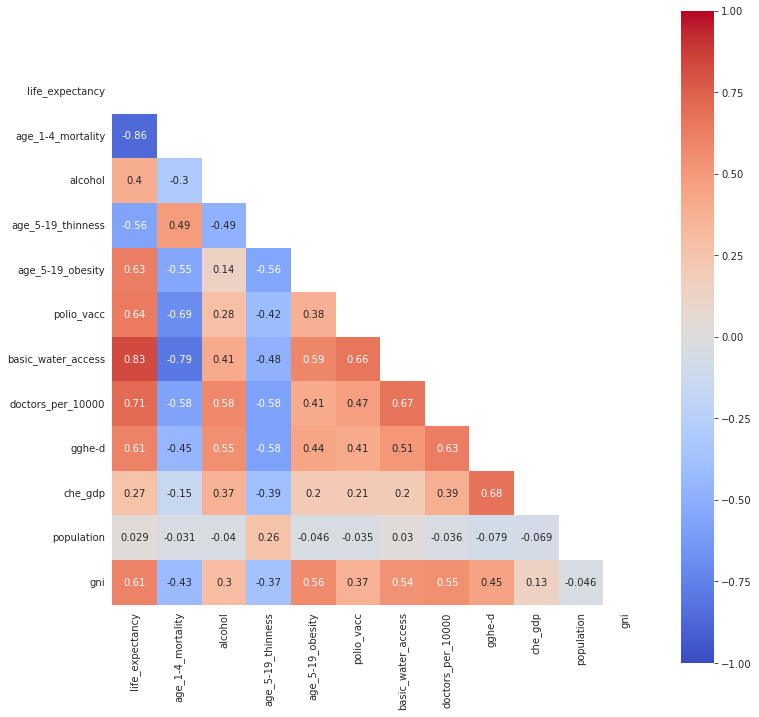

In [79]:
corr = life_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [80]:
# X / y Split on numeric data

X = life_num.drop('life_expectancy', axis=1)

y = life_num['life_expectancy'] 

In [81]:
# Train / Test Split on numeric data 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=123)

In [82]:
# Standardize the numerical data 

#TRAIN

std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)

In [83]:
#TEST

X_test_scaled=std_scaler.transform(X_test)

In [84]:
# Model fitting 

model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

In [85]:
#coefficients

model.coef_

array([-4.55735754, -0.45005822, -0.49092773,  0.28900467, -0.24049717,
        1.72971961,  1.13794282,  1.36045547, -0.15682257,  0.39456602,
        1.32320192])

In [86]:
#intercept

model.intercept_

69.21998391156463

In [87]:
#score of the model (R2) on the test set

R2 = model.score(X_test_scaled, y_test)

Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(R2)
print(Adj_R2)

0.8702258920534083
0.867751862265865


In [88]:
#score of the model (R2) on train set

R2 = model.score(X_train_scaled, y_train)

Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(R2)
print(Adj_R2)

0.8677676539151529
0.8652467599689946


In [89]:
y_pred=model.predict(X_test_scaled)

In [90]:
y_test

776     72.03635
1413    73.41284
449     73.01061
2410    80.27319
1469    64.14814
          ...   
2269    79.90195
196     66.56111
2455    67.41263
2118    76.69816
167     61.22800
Name: life_expectancy, Length: 589, dtype: float64

In [91]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
776,72.03635,69.204338
1413,73.41284,70.269365
449,73.01061,71.498279
2410,80.27319,75.529362
1469,64.14814,64.281105
...,...,...
2269,79.90195,78.313644
196,66.56111,65.061696
2455,67.41263,68.023667
2118,76.69816,76.857000


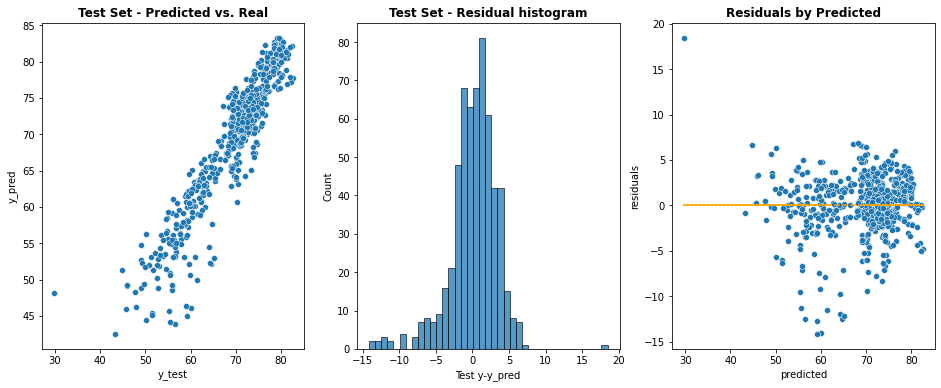

In [92]:
fig1, ax1 = plt.subplots(1,3, figsize=(16,6))

sns.scatterplot(x=y_pred, y=y_test, ax=ax1[0])
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title('Test Set - Predicted vs. Real', fontweight='bold')

sns.histplot(y_test-y_pred, ax = ax1[1])
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title('Test Set - Residual histogram', fontweight='bold')

sns.scatterplot(x = y_pred,y = y_test - y_pred, ax=ax1[2])
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title('Residuals by Predicted', fontweight='bold')
ax1[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed', color='orange')

In [93]:
#Model validation

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

MSE = mse(y_test,y_pred)
MAE = mae(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(MSE)
print(MAE)
print(RMSE)

10.867356286769644
2.400582866856249
3.2965673490419762


In [94]:
#Feature Importance (least important features on top because we wanted to decide if we should delete some columns)

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [95]:
features_importances

,Attribute,Importance
0,age_1-4_mortality,4.557358
5,basic_water_access,1.729720
7,gghe-d,1.360455
10,gni,1.323202
6,doctors_per_10000,1.137943
2,age_5-19_thinness,0.490928
1,alcohol,0.450058
9,population,0.394566
3,age_5-19_obesity,0.289005
4,polio_vacc,0.240497
